<a href="https://colab.research.google.com/github/ThalitaCoelhoAguiar/meus-notebooks-colab/blob/main/_Treinamento_CIS_3%C2%BA_Per%C3%ADodo_(Rede_Neural)_Thalita_Aguiar_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treinamento CIS - 3º Período (Redes Neurais) - Thalita  Aguiar:

## Importando BIBLIOTECAS

In [205]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

##Importaçao do Dataset


*   Importando diretamente do Kaggle
* Escolher arquivo kaggle.json

Os dados consistem em 100.000 observações do espaço feitas pelo SDSS (Sloan Digital Sky Survey). Cada observação é descrita por 17 colunas de características e 1 coluna de classe que a identifica como uma estrela, galáxia ou quasar.

obj_ID = Identificador de Objeto, o valor único que identifica o objeto no catálogo de imagens usado pelo CAS

alpha = Ângulo de Ascensão Reta (na época J2000)

delta = Ângulo de Declinação (na época J2000)

u = Filtro Ultravioleta no sistema fotométrico

g = Filtro Verde no sistema fotométrico

r = Filtro Vermelho no sistema fotométrico

i = Filtro Infravermelho Próximo no sistema fotométrico

z = Filtro Infravermelho no sistema fotométrico

run_ID = Número da Execução usado para identificar a varredura específica

rereun_ID = Número da Execução para especificar como a imagem foi processada

cam_col = Coluna da Câmera para identificar a linha de varredura dentro da execução

field_ID = Número do campo para identificar cada campo

spec_obj_ID = ID único usado para objetos espectroscópicos ópticos (isso significa que 2 observações diferentes com o mesmo spec_obj_ID devem compartilhar a classe de saída)

class = classe do objeto (galáxia, estrela ou quasar)

redshift = desvio para o vermelho valor baseado no aumento do comprimento de onda

plate = ID da placa, identifica cada placa no SDSS

MJD = Data Juliana Modificada, usada para indicar quando um dado do SDSS foi obtido

fiber_ID = ID da fibra que identifica a fibra que apontou a luz para o plano focal em cada observação

Cada placa (plate) é uma peça física que tem furos para posicionar as fibras óticas, direcionadas para as estrelas, galáxias

In [18]:
uploaded = files.upload()  # Selecione o CSV baixado
df = pd.read_csv(next(iter(uploaded)), sep=',')
df

Saving star_classification.csv.zip to star_classification.csv (2).zip


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## Análise Exploratória de Dados (EDA)

In [67]:
#Verificar colunas
print(df.columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


In [68]:
# Verifica quantos valores ausentes por coluna
missing_values = df.isnull().sum()
print(missing_values)

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [69]:
# Seleciona colunas com tipo de dados 'object'
data_qual = df.select_dtypes(include=['object'])
print(data_qual.columns)

Index(['class'], dtype='object')


In [70]:
#Verificar classes

classes = df['class'].unique()
print(classes)

['GALAXY' 'QSO' 'STAR']


In [71]:
data_numeric=df.select_dtypes(include=['float',int])

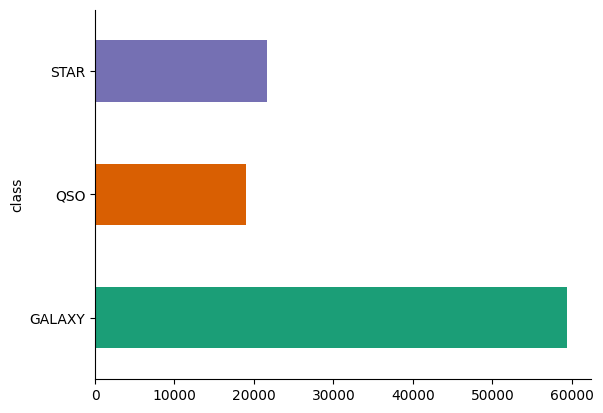

In [72]:
#Verificar a contagem de cada classificação: estrela, galáxia ou quasar

df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

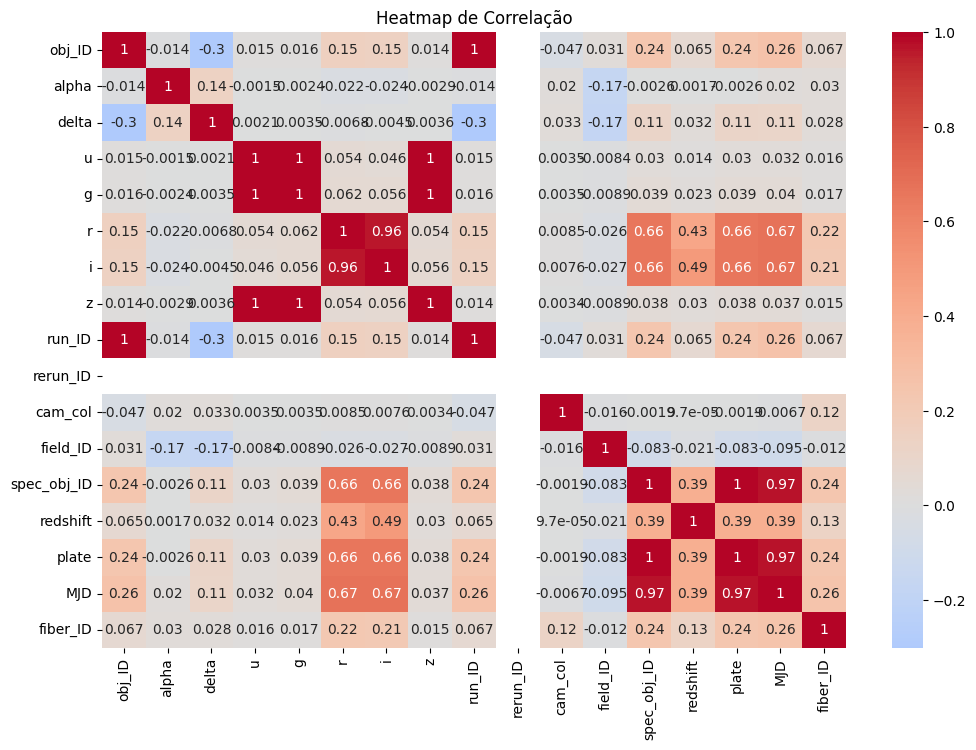

In [73]:
# Calcular a matriz de correlação
corr_matrix = data_numeric.corr()

# Plotar o heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

Algumas variaveis são apenas de identificação como rerun_ID, fiber_ID,field_ID,run_IDspec_obj_ID

Os filtros u,g,r,i,z possuem grande correlação entre si.

In [212]:
# Exibir a tabela organizada
df_var = df[['alpha','delta','u','g','r','i','z']]

minimos = df_var.min()
maximos = df_var.max()

display(pd.DataFrame({
    'Variável': minimos.index,
    'Mínimo': minimos.values,
    'Máximo': maximos.values
}))

,Variável,Mínimo,Máximo
0,alpha,0.005528,359.999810
1,delta,-18.785328,83.000519
2,u,-9999.000000,32.781390
3,g,-9999.000000,31.602240
4,r,9.822070,29.571860
5,i,9.469903,32.141470
6,z,-9999.000000,29.383740


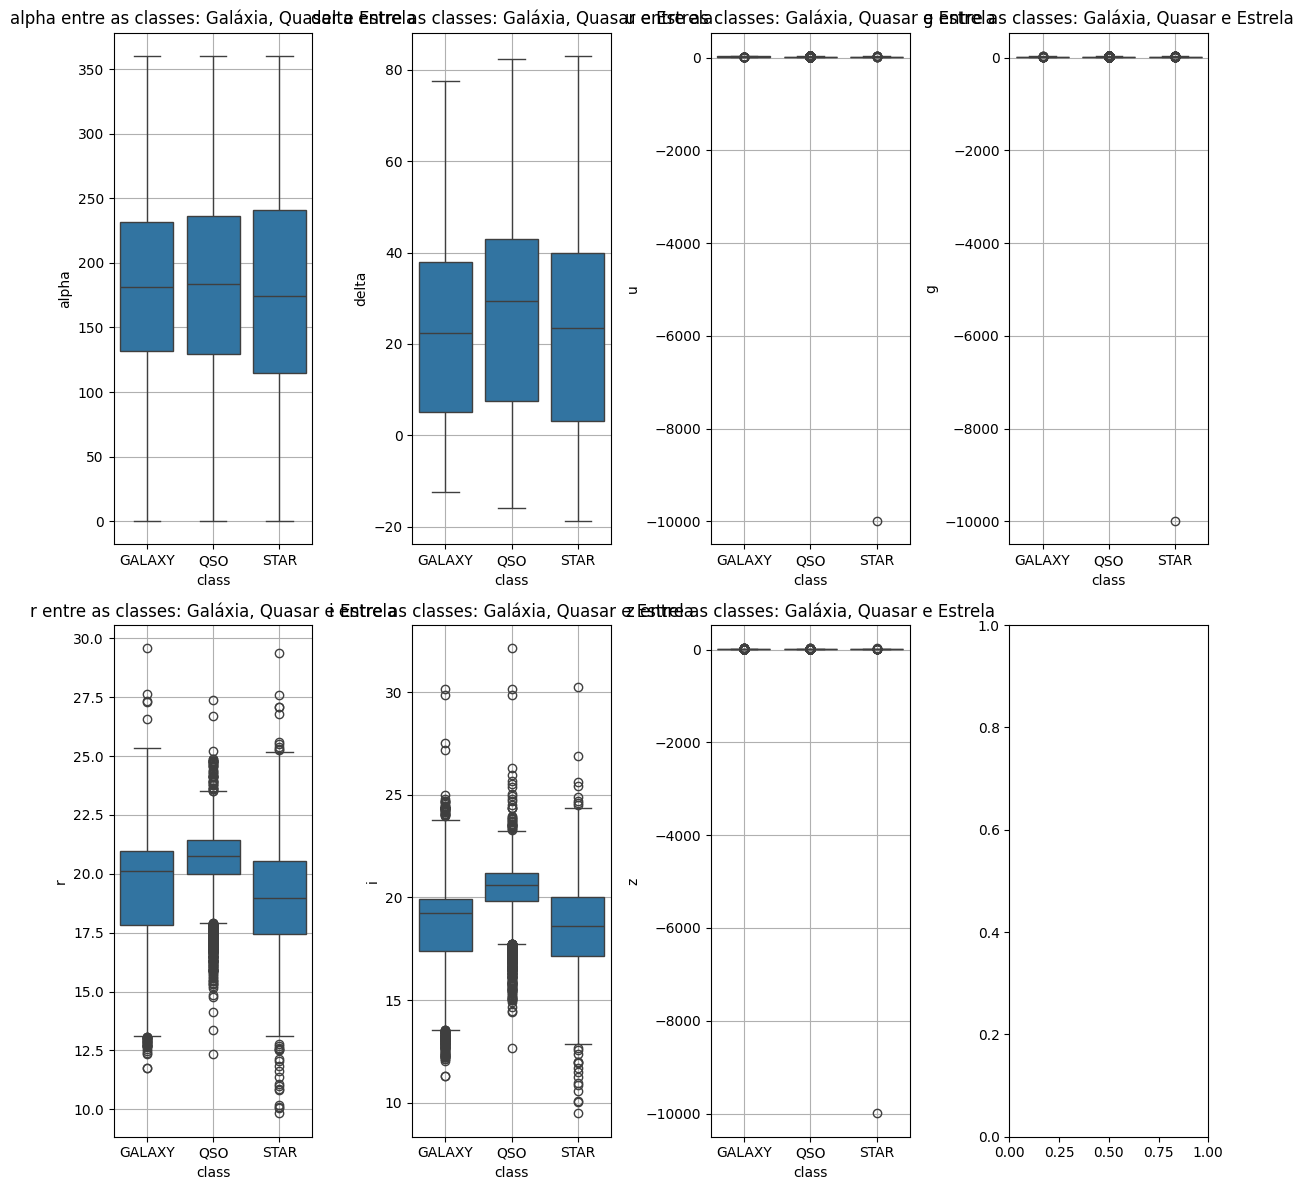

In [230]:
variables_to_plot = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z']

# Define quantas linhas e colunas
n_cols = 4
n_rows = (len(variables_to_plot) + n_cols - 1) // n_cols  # arredonda pra cima

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axs = axs.flatten()

for i, var in enumerate(variables_to_plot):
    sns.boxplot(x='class', y=var, data=df, ax=axs[i])
    axs[i].set_title(f'{var} entre as classes: Galáxia, Quasar e Estrela')
    axs[i].set_ylabel(var)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Rede neural de classificação entre galáxias, quasares e estrelas usando Tensorflow

Os parâmetros foram adicionados de forma cumulativa para se obter uma melhor acurácia do modelo. Para se verificar o impacto de cada parâmetro, o adequado é avaliar um por vez.

## Treinamento por MLPs with Keras

Utiliza de Retropropagação calcula rapidamente como ajustar cada peso e viés da rede para reduzir o erro, usando apenas duas passagens e aplicando o Gradiente Descendente para o treinamento.



### Separando o dataset em treino e teste

In [159]:
# Separando as variáveis
X = df.drop('class', axis=1) # features
y = df['class']   # target variable= classe


#Convertendo a variável classe em número
class_mapping = {'GALAXY': 0, 'STAR': 1, 'QSO': 2} # Define your mapping
y_encoded = y.map(class_mapping)

#Separando o dataset em conjunto de treino e teste
X_train_full, X_test_full, y_train_full, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Separando o conjunto de treinamento total em treinamento (80% do restante) e validação (20% do restante)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

### Definindo arquitetura da rede Neural

 Vai ser utilizado o framework do `Keras` para construir a rede neural. Foram construidas as camadas da a rede neural através do `Sequential()`.

In [160]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dropout(0.2),  # Dropout após primeira camada

    keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dropout(0.2),  # Dropout após segunda camada

    keras.layers.Dense(3, activation="softmax")  # Segunda camada de predição
])

O Dropout é uma técnica usada para camadas ocultas para regularização (reduzir overfitting).



In [186]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_137 (Dense)               │ (64, 256)              │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (64, 256)              │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (64, 3)                │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,515 (834.05 KB)

 Trainable params: 71,171 (278.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,344 (556.04 KB)

In [190]:
weights, biases = model.layers[0].get_weights()
print(weights)
print(biases)

[[-0.08647324 -0.07228145 -0.06796997 ... -0.11038936 -0.15323605
   0.04918822]
 [-0.127079    0.04270694  0.05280915 ... -0.01113557 -0.00710359
  -0.03281177]
 [ 0.1287171  -0.12898864 -0.00384401 ...  0.12362591  0.07738116
   0.13905984]
 ...
 [-0.03484874  0.10741669  0.11970481 ...  0.02403084  0.01167819
  -0.09112898]
 [-0.03384687  0.12862349  0.12453589 ...  0.01370524 -0.02201676
   0.03499572]
 [-0.00907917  0.03923056  0.02542418 ... -0.05245046 -0.0157844
  -0.10823103]]
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.1437529e-02
  2.5661442e-02 -2.6690496e-02  0.0000000e+00 -5.9460651e-02
  0.0000000e+00 -4.8544444e-02  5.1466594e-03  8.8901063e-03
 -5.3182818e-02 -4.2176288e-02  3.9673392e-03  2.5153097e-02
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -6.8030402e-02
 -1.8317156e-02 -5.4359675e-04  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -5.1600907e-02  0.0000000e+00
 -3.3182122e-02 -2.6794562e-02  1.1188872e-02  0.0000000e+00
  0.0000000e+00 -2.72

In [170]:
# Compilar o modelo para o treinamentos ou teste
model.compile(
    optimizer='sgd', #ot imizador para minimizar a função perda e ajustar os pesos do modelo
    loss='sparse_categorical_crossentropy',#função perda
    metrics=['accuracy']
)

O otimizador SGD é uma forma mais rápida e leve de fazer Gradiente Descendente, atualizando os pesos usando uma amostra ou mini-batch por vez, em vez de todo o dataset.

#### Quantidade de épocas: 10

In [171]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5953 - loss: 0.9544 - val_accuracy: 0.5901 - val_loss: 0.9604
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5920 - loss: 0.9580 - val_accuracy: 0.5901 - val_loss: 0.9604
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5909 - loss: 0.9594 - val_accuracy: 0.5901 - val_loss: 0.9605
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5916 - loss: 0.9585 - val_accuracy: 0.5901 - val_loss: 0.9605
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5993 - loss: 0.9504 - val_accuracy: 0.5901 - val_loss: 0.9603
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5991 - loss: 0.9505 - val_accuracy: 0.5901 - val_loss: 0.9603
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5960 - loss: 0.9540 - val_accuracy: 0.5901 - val_loss: 0.9604
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5953 - loss: 0.9549 - 

ocorre underfitting, o modelo não aprende bem, a acurácia é baixa e não evolui com o passar das épocas

* Testar o efeito de se variar a largura e a profundidade da rede neural;
* Treine o modelo testando diferentes valores de épocas e learning rate,
identificando quando se acontece Overfitting ou Underfitting;
* Testar o efeito da Regularização e outros métodos de otimização;


* largura: número de neurônios por camada
* profundidade: número de camadas

### Aumentar a largura : número de neurônios por camada (de 128 para 256)

In [185]:
model = keras.models.Sequential([
    keras.layers.Dense(256, activation="relu"), # primeira camada

    keras.layers.Dense(256, activation="relu"), # segunda camada

    keras.layers.Dense(3, activation="softmax")  # Última camada
])

# Compilar o modelo para o treinamentos ou teste
model.compile(
    optimizer='adam', #foi trocado o otimizador
    loss='sparse_categorical_crossentropy',#função perda
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid)) #aplicando batchsize

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4712 - loss: 48351204220076032.0000 - val_accuracy: 0.3528 - val_loss: 22421125149491200.0000
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4791 - loss: 13323428786339840.0000 - val_accuracy: 0.5003 - val_loss: 2869637570101248.0000
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4944 - loss: 5857742149386240.0000 - val_accuracy: 0.5842 - val_loss: 1096210609864704.0000
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4900 - loss: 3474202803830784.0000 - val_accuracy: 0.6154 - val_loss: 1583317681963008.0000
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4991 - loss: 1667379989839872.0000 - val_accuracy: 0.6024 - val_loss: 1693915505754112.0000
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5025 - loss: 653170237767680.0000 - val_accuracy: 0.4959 - val_loss: 554761061400576.0000
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━

### Aumentar a profundidade  (de 2 para 10 camadas)

In [189]:
model = keras.models.Sequential()
for _ in range(10):
    model.add(keras.layers.Dense(256, activation="relu"))  #camada

model.add(keras.layers.Dense(3, activation="softmax"))  # camada de saída

# Compilar o modelo para o treinamentos ou teste
model.compile(
    optimizer='adam', #foi trocado o otimizador
    loss='sparse_categorical_crossentropy',#função perda
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10 , batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - accuracy: 0.4778 - loss: 1498546167611392.0000 - val_accuracy: 0.5442 - val_loss: 2181681250304.0000
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.4854 - loss: 5185969061888.0000 - val_accuracy: 0.5606 - val_loss: 410044071936.0000
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.5025 - loss: 394475962368.0000 - val_accuracy: 0.4825 - val_loss: 153548521472.0000
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.4981 - loss: 23883698667520.0000 - val_accuracy: 0.5541 - val_loss: 20535066624.0000
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5693 - loss: 18892247040.0000 - val_accuracy: 0.5901 - val_loss: 10398153728.0000
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.5770 - loss: 4437615616.0000 - val_accuracy: 0.5763 - val_loss: 2175100416.0000
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5860 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

### Aplicando normalizaçoes: Batchnormalization e Dropout e learning rate para evitar overfitting

In [201]:
model = keras.models.Sequential()
for _ in range(10):
    model.add(keras.layers.Dense(256, activation="relu"))  #camada
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(3, activation="softmax"))  # camada de saída

# Compilar o modelo para o treinamentos ou teste
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, decay=1e-4), #foi adicionado learning rate
    loss='sparse_categorical_crossentropy',#função perda
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10 , batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.5686 - loss: 1.0253 - val_accuracy: 0.6191 - val_loss: 0.8741
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.6010 - loss: 0.8881 - val_accuracy: 0.6078 - val_loss: 0.8798
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.6042 - loss: 0.8812 - val_accuracy: 0.6403 - val_loss: 0.8562
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6098 - loss: 0.8791 - val_accuracy: 0.6181 - val_loss: 0.8748
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6135 - loss: 0.8765 - val_accuracy: 0.6215 - val_loss: 0.8588
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.6081 - loss: 0.8828 - val_accuracy: 0.5968 - val_loss: 0.9010
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6121 - loss: 0.8780 - val_accuracy: 0.5901 - val_loss: 0.9351
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6116 - loss: 0.87

Apesar de ainda não ter resultados excelentes, com todos os parêmetros foi o melhor entre todos

### Curvas de Treinamento e acurâcia

São importantes para analisar se o modelo está de fato aprendendo e  é possível inferir se está havendo undefitting ou overfitting

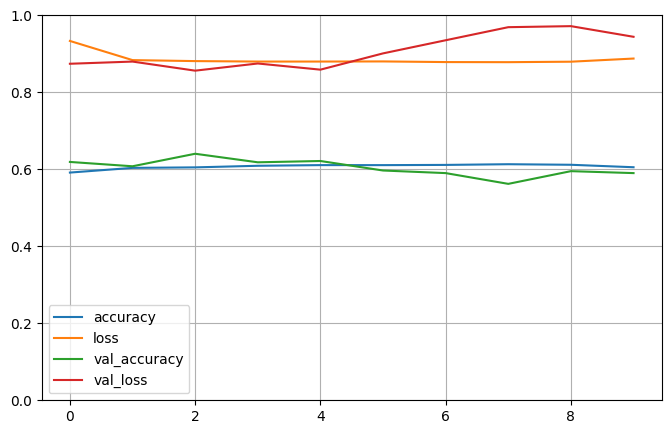

In [203]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

De todos, os treinamento, foi o que teve ligeiro aumento na acuràcia e redução

## Predição do cojunto dos dados teste

Escolher uma variável de um lote aleatório e fazer predição com o modelo contruído. Depois mostrar a variável aleatória escolhida, sua predição e sua classe verdadeira.

In [204]:
# Select a random sample of 5 rows from the test set
X_new = X_test_full.sample(n=5, random_state=42)
y_true_new = y_test.loc[X_new.index] # Get the true labels for the sampled data

y_pred = np.argmax(model.predict(X_new), axis=-1)


print("Predicted classes:", y_pred)
print("True classes:", y_true_new.values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Predicted classes: [0 0 0 0 0]
True classes: [0 0 0 2 0]


Sendo que:

* 'GALAXY': 0

* 'STAR': 1

* 'QSO': 2

